In [1]:
include("code/sinkhorn.jl")
include("code/acoustic_solver.jl")
using PyPlot, JLD2

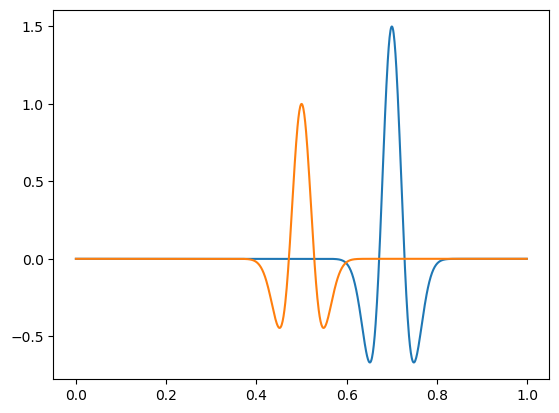

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f66c853f210>
 PyObject <matplotlib.lines.Line2D object at 0x7f66c853f4d0>

In [2]:
Fs = 1000
Nt = 1000
dt = 1/Fs
t = range(0, step=dt, length=Nt)

g = source_ricker(8, 0.5, t)
f = 1.5*source_ricker(8, 0.7, t)

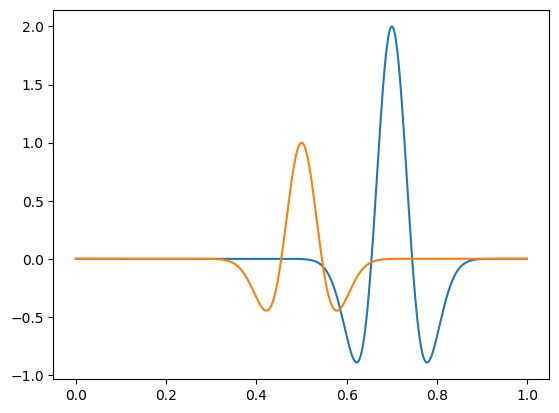

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f66c8118ad0>
 PyObject <matplotlib.lines.Line2D object at 0x7f66c8267110>

In [19]:
plot(t,f,t,g)

In [54]:
M = cost_matrix_1d(t,t; p=2)
reg = 1e-5
reg_m = 1e0
reg_p = 1
iterMax = 1000;

In [55]:
# L2
time_shift = 0.3:0.01:0.7
n = length(time_shift)
misfit_l2 = zeros(n)
misfit_uot = zeros(n)
misfit_ot = zeros(n)
g = source_ricker(8, 0.5, t)

for i = 1:n
    f = 1.5*source_ricker(8, time_shift[i], t)
    TT,gg,misfit_uot[i] = unbalanced_sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg, reg_m; iterMax=iterMax);
    TT,gg,misfit_ot[i] = sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg; iterMax=iterMax);
    misfit_l2[i] = norm(f-g,2)^2
end
# plot(time_shift, misfit_l2)

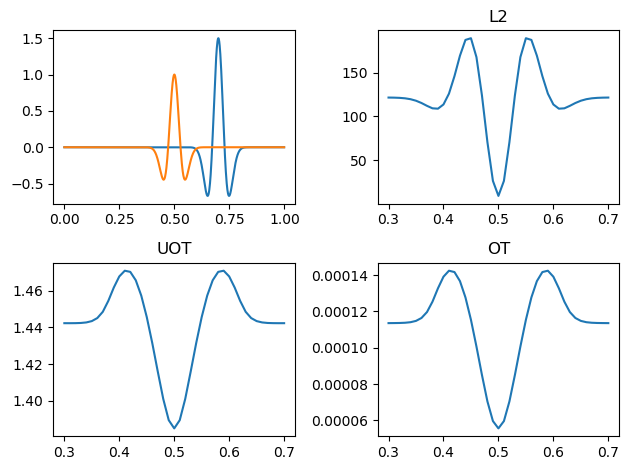

In [56]:
figure

subplot(221); plot(t,f,t,g)
subplot(222); plot(time_shift, misfit_l2); title("L2")
subplot(223); plot(time_shift, misfit_uot); title("UOT")
subplot(224); plot(time_shift, misfit_ot); title("OT")
tight_layout()

# adj source

In [13]:
g = source_ricker(5, 0.5, t)
f = 2*source_ricker(5, 0.7, t);

M = cost_matrix_1d(t,t; p=2)
reg = 1e-5
reg_m = 1e0
reg_p = 1
iterMax = 5000;

adj_l2 = f-g
TT,adj_uot,dd = unbalanced_sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg, reg_m; iterMax=iterMax);
TT,adj_ot, dd = sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg; iterMax=iterMax);

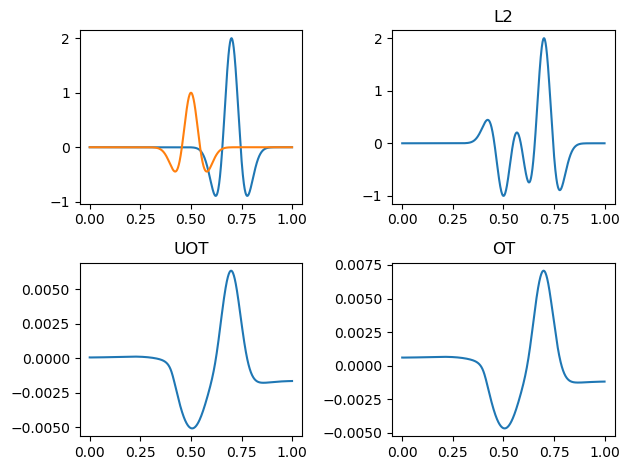

In [14]:
figure

subplot(221); plot(t,f,t,g)
subplot(222); plot(t, adj_l2); title("L2")
subplot(223); plot(t, adj_uot); title("UOT")
subplot(224); plot(t, adj_ot); title("OT")
tight_layout()

# Iteration

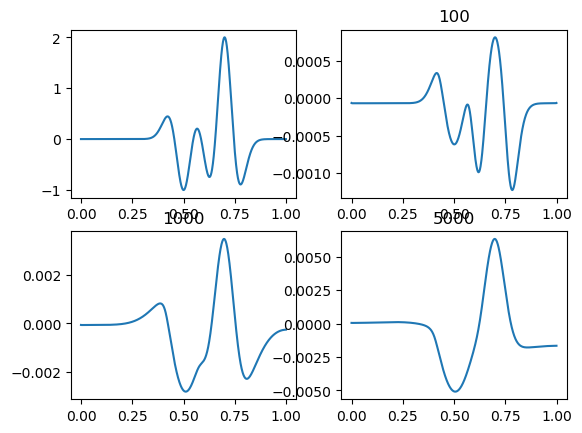

PyObject Text(0.5, 1, '5000')

In [20]:
g = source_ricker(5, 0.5, t)
f = 2*source_ricker(5, 0.7, t);

M = cost_matrix_1d(t,t; p=2)
reg = 1e-5
reg_m = 1e0
reg_p = 1
iterMax = 5000;

adj_l2 = f-g
subplot(221); plot(t,f-g)
TT,adj_uot,dd = unbalanced_sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg, reg_m; iterMax=100);
subplot(222); plot(t,adj_uot); title(100)
TT,adj_uot,dd = unbalanced_sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg, reg_m; iterMax=1000);
subplot(223); plot(t,adj_uot); title(1000)
TT,adj_uot,dd = unbalanced_sinkhorn_1d(f.+reg_p, g.+reg_p, M, reg, reg_m; iterMax=5000);
subplot(224); plot(t,adj_uot); title(5000)